In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import re

In [2]:
data = pd.read_csv('enhanced_curriculum_table.csv')

In [3]:
data['Prerequisites'] = data['Prerequisites'].astype(str).str.strip().replace('NaN', np.nan)

In [4]:
def extract_courses(prereq):
    if pd.isna(prereq):
        return[]
    courses = re.findall(r"[A-Z]{2,4}\s*\d{3}", prereq)
    return list(dict.fromkeys(courses))

In [5]:
data["Cleaned_Prereqs"] = data["Prerequisites"].apply(extract_courses)

In [7]:
G = nx.DiGraph()
for _, row in data.iterrows():
    course_id = row["Course ID"]
    G.add_node(course_id, 
               name=row["Course Name"],
               major=row["Major Code"],
               year=row["Year Level"],
               term=row["Term Season"],
               credits=row["Credits"],
               has_prereq=row["Has Prerequisites"])

In [10]:
for _, row in data.iterrows():
    course = row["Course ID"]
    prereqs = row["Cleaned_Prereqs"]
    for p in prereqs:
        G.add_edge(p, course)  # Directed edge prereq → course

In [11]:
print(f"Total nodes: {G.number_of_nodes()}")
print(f"Total edges: {G.number_of_edges()}")
print("Sample edges:")
print(list(G.edges())[:10])

Total nodes: 306
Total edges: 198
Sample edges:
[('MTH 103', 'CEM 141'), ('MTH 103', 'MTH 114'), ('MTH 103', 'MTH 124'), ('MTH 103', 'STT 224'), ('MTH 116', 'MTH 132'), ('MTH 116', 'CEM 151'), ('CEM 141', 'CEM 142'), ('CEM 141', 'CEM 161'), ('CEM 141', 'CEM 251'), ('CEM 141', 'BS 161')]


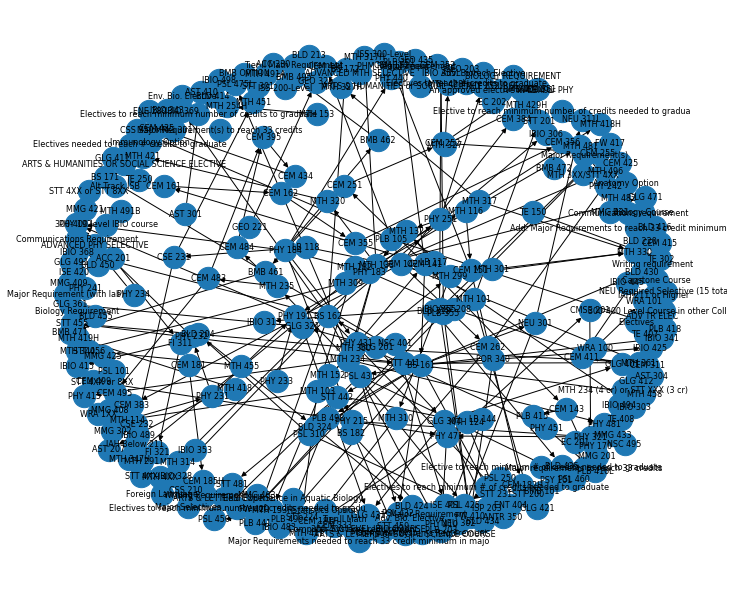

In [12]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8)
plt.show()

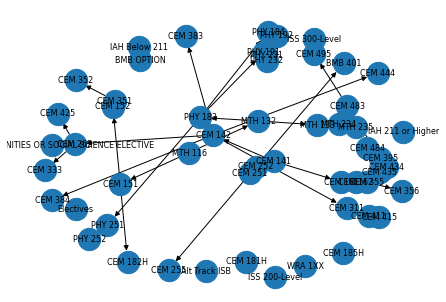

In [13]:
major = "Chemistry"
sub = G.subgraph(data[data["Major Title"] == major]["Course ID"])
nx.draw(sub, with_labels=True, node_size=500, font_size=8)
plt.show()